In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# ! pip install tensorflow
# ! pip install tensorflow-gpu
# ! pip install keras-tuner 

In [3]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [5]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model

In [6]:
from keras_tuner import RandomSearch

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
#reading train data
df_train = pd.DataFrame()

df_train1 = pd.DataFrame()
df_train1 = pd.read_csv("/content/drive/MyDrive/BTP/Data/final/envelopes/2/train/1.csv")
df_train1 = df_train1.drop(df_train1.columns[0], axis=1)  
df_train1["target"] = np.ones(df_train1.shape[0], dtype="int")
df_train = pd.concat([df_train, df_train1], axis=0)

df_train0 = pd.DataFrame()
df_train0 = pd.read_csv("/content/drive/MyDrive/BTP/Data/final/envelopes/2/train/0.csv")
df_train0 = df_train0.drop(df_train0.columns[0], axis=1)  
df_train0["target"] = np.zeros(df_train0.shape[0], dtype="int")
df_train = pd.concat([df_train, df_train0], axis=0)

#reading test data
df_test = pd.DataFrame()

df_test1 = pd.DataFrame()
df_test1 = pd.read_csv("/content/drive/MyDrive/BTP/Data/final/envelopes/2/test/1.csv")
df_test1 = df_test1.drop(df_test1.columns[0], axis=1)  
df_test1["target"] = np.ones(df_test1.shape[0], dtype="int")
df_test = pd.concat([df_test, df_test1], axis=0)

df_test0 = pd.DataFrame()
df_test0 = pd.read_csv("/content/drive/MyDrive/BTP/Data/final/envelopes/2/test/0.csv")
df_test0 = df_test0.drop(df_test0.columns[0], axis=1)  
df_test0["target"] = np.zeros(df_test0.shape[0], dtype="int")
df_test = pd.concat([df_test, df_test0], axis=0)

df_train = df_train.sample(frac=1)
df_test = df_test.sample(frac=1)

In [9]:
X_train = df_train.drop("target", axis=1)
Y_train = df_train["target"]

X_train = np.array(X_train)
Y_train = np.array(Y_train, dtype='int')

X_test = df_test.drop("target", axis=1)
Y_test = df_test["target"]

X_test = np.array(X_test)
Y_test = np.array(Y_test, dtype='int')

mm = MinMaxScaler()

X_train = mm.fit_transform(X_train)
X_test = mm.fit_transform(X_test)

In [10]:
X_test, X_valid, Y_test, Y_valid = train_test_split(X_test, Y_test, test_size=0.5, random_state=0)

In [11]:
def MLP1_tuning(hp):
  model = Sequential()
  model.add(Dense(hp.Int('hidden layer 1', min_value=500, max_value=2001, step=500), activation='relu', input_shape=(500, )))

  model.add(Dense(2, activation='softmax'))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [12]:
tuner = RandomSearch(MLP1_tuning,
                     objective='val_accuracy',
                     max_trials=100,
                     executions_per_trial=5,
                     project_name='tuning')

tuner.search(x=X_train, y=Y_train,
             epochs=100,
             batch_size=32,
             validation_data=(X_valid, Y_valid))    

Trial 4 Complete [00h 06m 32s]
val_accuracy: 0.5967999935150147

Best val_accuracy So Far: 0.6027999877929687
Total elapsed time: 00h 24m 55s
INFO:tensorflow:Oracle triggered exit


In [13]:
print('BEST PARAMETERS')
print('hidden layer 1:', tuner.get_best_hyperparameters()[0].values['hidden layer 1'])

BEST PARAMETERS
hidden layer 1: 1000


In [14]:
def MLP1():

  model = Sequential()
  model.add(Dense(1000, activation='relu', input_shape=(500,)))
  model.add(Dense(2, activation='softmax'))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1000)              501000    
                                                                 
 dense_3 (Dense)             (None, 2)                 2002      
                                                                 
Total params: 503,002
Trainable params: 503,002
Non-trainable params: 0
_________________________________________________________________
None






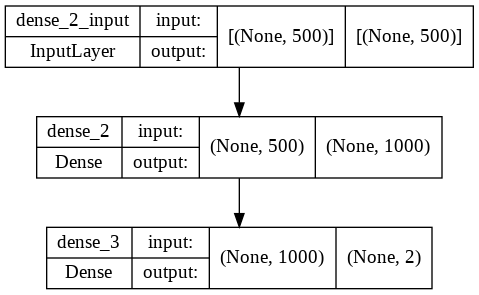

In [15]:
mlp1 = MLP1()
print(mlp1.summary())
print('\n')
print('\n')
plot_model(mlp1, to_file='mlp2.png', show_shapes=True, show_layer_names=True)

In [16]:
history = mlp1.fit(X_train, Y_train, 
                   batch_size=32,
                   epochs=100, 
                   validation_data=[X_valid, Y_valid],
                   verbose=1)

Epoch 1/100
125/125 [==============================] - 2s 8ms/step - loss: 0.7000 - accuracy: 0.5555 - val_loss: 0.6813 - val_accuracy: 0.5540
Epoch 2/100
125/125 [==============================] - 1s 6ms/step - loss: 0.6755 - accuracy: 0.5817 - val_loss: 0.6748 - val_accuracy: 0.5580
Epoch 3/100
125/125 [==============================] - 1s 6ms/step - loss: 0.6776 - accuracy: 0.5675 - val_loss: 0.6705 - val_accuracy: 0.5740
Epoch 4/100
125/125 [==============================] - 1s 5ms/step - loss: 0.6655 - accuracy: 0.5910 - val_loss: 0.6731 - val_accuracy: 0.5700
Epoch 5/100
125/125 [==============================] - 1s 6ms/step - loss: 0.6637 - accuracy: 0.5863 - val_loss: 0.6713 - val_accuracy: 0.5600
Epoch 6/100
125/125 [==============================] - 1s 5ms/step - loss: 0.6630 - accuracy: 0.5918 - val_loss: 0.6741 - val_accuracy: 0.5740
Epoch 7/100
125/125 [==============================] - 0s 4ms/step - loss: 0.6600 - accuracy: 0.6003 - val_loss: 0.6755 - val_accuracy: 0.5400

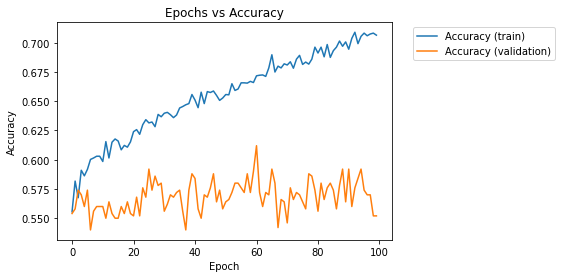

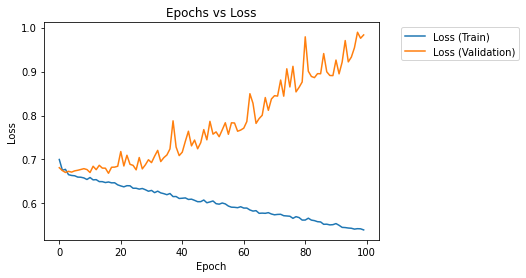

In [17]:
plt.plot(history.history['accuracy'], label='Accuracy (train)')
plt.plot(history.history['val_accuracy'], label = 'Accuracy (validation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.figure()

plt.plot(history.history['loss'], label='Loss (Train)')
plt.plot(history.history['val_loss'], label = 'Loss (Validation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [18]:
Y_pred_train = np.argmax(mlp1.predict(X_train), axis=1)
Y_pred_test = np.argmax(mlp1.predict(X_test), axis=1)

print("Classification Report(Train)\n")
print(classification_report(Y_train, Y_pred_train))

print('\n')

print("Classification Report(Test)\n")
print(classification_report(Y_test, Y_pred_test))

Classification Report(Train)

              precision    recall  f1-score   support

           0       0.71      0.74      0.72      2000
           1       0.73      0.69      0.71      2000

    accuracy                           0.72      4000
   macro avg       0.72      0.72      0.72      4000
weighted avg       0.72      0.72      0.72      4000



Classification Report(Test)

              precision    recall  f1-score   support

           0       0.57      0.70      0.63       257
           1       0.58      0.44      0.50       242

    accuracy                           0.57       499
   macro avg       0.57      0.57      0.56       499
weighted avg       0.57      0.57      0.57       499



Train CM


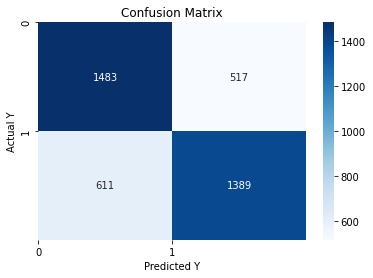





Test CM


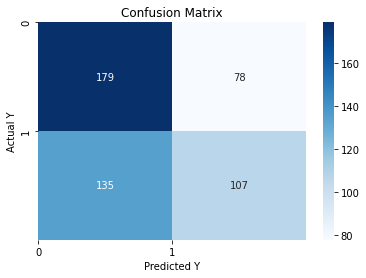

In [20]:
print('Train CM')
cm = confusion_matrix(Y_train, Y_pred_train)

sns.heatmap(cm, annot=True, fmt='.4g', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')

plt.xticks(np.arange(2));
plt.yticks(np.arange(2));
plt.show()

print('\n')
print('\n')

print('Test CM')
cm = confusion_matrix(Y_test, Y_pred_test)

sns.heatmap(cm, annot=True, fmt='.3g', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')

plt.xticks(np.arange(2));
plt.yticks(np.arange(2));

plt.show()